# Q* Learning with OpenAI Taxi-v2 🕹️🚕
<br> 
In this Notebook, we'll implement an agent <b>that plays OpenAI Taxi-V2.</b>

<img src="taxi.png" alt="Taxi"/>

The goal of this game is that our agent must <b>pick up the passenger at one location and drop him off to the goal as fast as possible.</b>

There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. 

- You receive +20 points for a successful dropoff
- Lose 1 point for every timestep it takes. 
- There is also a 10 point penalty for illegal pick-up and drop-off actions (if you don't drop the passenger in one of the 3 other locations)

# This is a notebook from [Deep Reinforcement Learning Course with Tensorflow](https://simoninithomas.github.io/Deep_reinforcement_learning_Course/)
<img src="https://raw.githubusercontent.com/simoninithomas/Deep_reinforcement_learning_Course/master/docs/assets/img/DRLC%20Environments.png" alt="Deep Reinforcement Course"/>
<br>
<p>  Deep Reinforcement Learning Course is a free series of articles and videos tutorials 🆕 about Deep Reinforcement Learning, where **we'll learn the main algorithms (Q-learning, Deep Q Nets, Dueling Deep Q Nets, Policy Gradients, A2C, Proximal Policy Gradients…), and how to implement them with Tensorflow.**
<br><br>
    
📜The articles explain the architectures from the big picture to the mathematical details behind them.
<br>
📹 The videos explain how to build the agents with Tensorflow </b></p>
<br>
This course will give you a **solid foundation for understanding and implementing the future state of the art algorithms**. And, you'll build a strong professional portfolio by creating **agents that learn to play awesome environments**: Doom© 👹, Space invaders 👾, Outrun, Sonic the Hedgehog©, Michael Jackson’s Moonwalker, agents that will be able to navigate in 3D environments with DeepMindLab (Quake) and able to walk with Mujoco. 
<br><br>
</p> 

## 📚 The complete [Syllabus HERE](https://simoninithomas.github.io/Deep_reinforcement_learning_Course/)


## Any questions 👨‍💻
<p> If you have any questions, feel free to ask me: </p>
<p> 📧: <a href="mailto:hello@simoninithomas.com">hello@simoninithomas.com</a>  </p>
<p> Github: https://github.com/simoninithomas/Deep_reinforcement_learning_Course </p>
<p> 🌐 : https://simoninithomas.github.io/Deep_reinforcement_learning_Course/ </p>
<p> Twitter: <a href="https://twitter.com/ThomasSimonini">@ThomasSimonini</a> </p>
<p> Don't forget to <b> follow me on <a href="https://twitter.com/ThomasSimonini">twitter</a>, <a href="https://github.com/simoninithomas/Deep_reinforcement_learning_Course">github</a> and <a href="https://medium.com/@thomassimonini">Medium</a> to be alerted of the new articles that I publish </b></p>
    
## How to help  🙌
3 ways:
- **Clap our articles and like our videos a lot**:Clapping in Medium means that you really like our articles. And the more claps we have, the more our article is shared Liking our videos help them to be much more visible to the deep learning community.
- **Share and speak about our articles and videos**: By sharing our articles and videos you help us to spread the word. 
- **Improve our notebooks**: if you found a bug or **a better implementation** you can send a pull request.
<br>

## Important note 🤔
<b> You can run it on your computer but it's better to run it on GPU based services</b>, personally I use Microsoft Azure and their Deep Learning Virtual Machine (they offer 170$)
https://azuremarketplace.microsoft.com/en-us/marketplace/apps/microsoft-ads.dsvm-deep-learning
<br>
⚠️ I don't have any business relations with them. I just loved their excellent customer service.

If you have some troubles to use Microsoft Azure follow the explainations of this excellent article here (without last the part fast.ai): https://medium.com/@manikantayadunanda/setting-up-deeplearning-machine-and-fast-ai-on-azure-a22eb6bd6429

## Prerequisites 🏗️
Before diving on the notebook **you need to understand**:
- The foundations of Reinforcement learning (MC, TD, Rewards hypothesis...) [Article](https://medium.freecodecamp.org/an-introduction-to-reinforcement-learning-4339519de419)
- Q-learning [Article](https://medium.freecodecamp.org/diving-deeper-into-reinforcement-learning-with-q-learning-c18d0db58efe)
- You can follow this notebook using my [video tutorial](https://www.youtube.com/watch?v=q2ZOEFAaaI0) 

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/q2ZOEFAaaI0?showinfo=0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')


## Step 0: Import the dependencies 📚
First, we need to import the libraries <b>that we'll need to create our agent.</b></br>
We use 3 libraries:
- `Numpy` for our Qtable
- `OpenAI Gym` for our Taxi Environment
- `Random` to generate random numbers

In [2]:
# we are taking a Q learning policy-based RL approach

import numpy as np
import gym
import random

## Step 1: Create the environment 🎮
- Here we'll create the Taxi environment. 
- OpenAI Gym is a library <b> composed of many environments that we can use to train our agents.</b>

In [3]:
env = gym.make("Taxi-v2")
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



## Step 2: Create the Q-table and initialize it 🗄️
- Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size
- OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

In [4]:
action_size = env.action_space.n
print("Number of actions ", action_size)

state_size=env.observation_space.n
print("Number of states ", state_size)

Number of actions  6
Number of states  500


In [5]:
qtable = np.zeros((state_size, action_size))
qtable
#holds maximum expected future reward for each action at each state 

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

## Step 3: Create the hyperparameters ⚙️
Here, we'll specify the hyperparameters.

In [6]:
total_episodes = 50000
total_test_episodes = 100
max_steps = 99 # Max steps per episode

learning_rate = 0.7
gamma = 0.618 # discount rate ; smaller discount rate means care more about close values

# exploration parameters
epsilon = 1.0 # exploration rate
max_epsilon = 1.0 # exploration probablity at state
min_epsilon = 0.01 # minimum exploration probability
decay_rate = 0.01 # exponential decay rate for exploraation prob


## Step 4: The Q learning algorithm 🧠
- Now we implement the Q learning algorithm:
<img src="qtable_algo.png" alt="Q algo"/>

In [16]:
rewards = []

# For life or until larning is stopped 
for episode in range(total_episodes):
    #reset the environment
    state = env.reset()
    step = 0
    done = False
    total_reward = 0
    
    for step in range(max_steps):
        # 3. choose an action a in the current world state (s)
        ## First we randomize a number to decide whether we are in exploration or expoitation
        exp_exp_tradeoff = random.uniform(0,1)
        
        ## If the random number > epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            #perform action associated with highest Q value for this state
            action = np.argmax(qtable[state,:])#output the index of the action associated with the highest Q value at that state
        
        #else doing a random choice --> exploration
        else:
            action = env.action_space.sample() #sample from pool of possible actions randomly to explore
        
        #take the action a and observe the outcome state (s') and reward (r)
        new_state, reward, done, info = env.step(action)
        
        # update Q values using bellman equation 
        #update Q(s,a):= Q(s,a) + lr [R(s,a)+gamma*maxQ(s',a')-Q(s,a)]
        qtable[state,action]=qtable[state,action]+learning_rate*(reward+gamma*np.max(qtable[new_state,:]) - qtable[state, action])
        total_reward += reward
        
        # our new state is state
        state = new_state
        
        # If done: finish episode
        if done == True:
            rewards.append(total_reward)
            break
    
    episode += 1
    
    #reduce epsilon (so that there is less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
# Now our agent is trained!

Text(0,0.5,'Score')

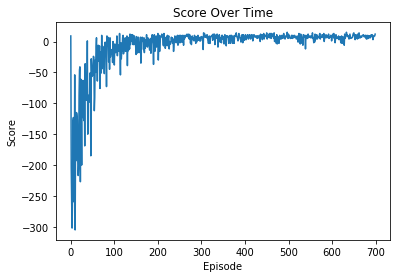

In [33]:
plt.plot(rewards[0:700])
ax=plt.gca()
#ax.set_ylim(0,20)
ax.set_title('Score Over Time')
ax.set_xlabel('Episode')
ax.set_ylabel('Score')

In [49]:
qtable # for each state shows the max expected future reward

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -1.89494435,  -1.44813002,  -1.89494435,  -1.44813002,
         -0.72512948, -10.44813002],
       [ -0.72512948,   0.4447743 ,  -0.72512948,   0.4447743 ,
          2.33782249,  -8.5552257 ],
       ...,
       [  2.33485041,   5.40100727,   2.23181146,   0.44431591,
         -6.6621777 ,  -6.68947971],
       [ -2.4510893 ,  -1.44813002,  -2.06406707,  -2.47791965,
        -10.9008045 ,  -9.9471692 ],
       [ 16.66099906,  10.05906128,  18.37775057,  31.35602094,
          9.36608137,   9.37118437]])

## Step 5: Use our Q-table to play Taxi ! 🚖
- After 50 000 episodes, our Q-table can be used as a "cheatsheet" to play Taxi.
- By running this cell you can see our agent playing Taxi.

In [46]:
env.reset()
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    if episode <5:
        print("****************************************")
        print('EPISODE ', episode)
    
    for step in range(max_steps):
        if episode <5:
            env.render()
        #Take the action index that has the max expected futture reward given that state (Q-value)
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            if episode <5:
                print("Score", total_rewards)
            break
        state = new_state
env.close()
print("Score over time: " + str(np.mean(rewards)))

****************************************
EPISODE  0
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | :

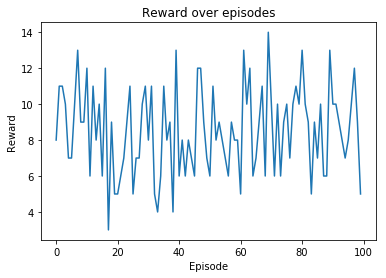

In [47]:
import matplotlib.pyplot as plt
plt.plot(np.arange(total_test_episodes),rewards)
ax=plt.gca()
ax.set_title("Reward over episodes")
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
plt.show();


In [48]:
qtable

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -1.89494435,  -1.44813002,  -1.89494435,  -1.44813002,
         -0.72512948, -10.44813002],
       [ -0.72512948,   0.4447743 ,  -0.72512948,   0.4447743 ,
          2.33782249,  -8.5552257 ],
       ...,
       [  2.33485041,   5.40100727,   2.23181146,   0.44431591,
         -6.6621777 ,  -6.68947971],
       [ -2.4510893 ,  -1.44813002,  -2.06406707,  -2.47791965,
        -10.9008045 ,  -9.9471692 ],
       [ 16.66099906,  10.05906128,  18.37775057,  31.35602094,
          9.36608137,   9.37118437]])